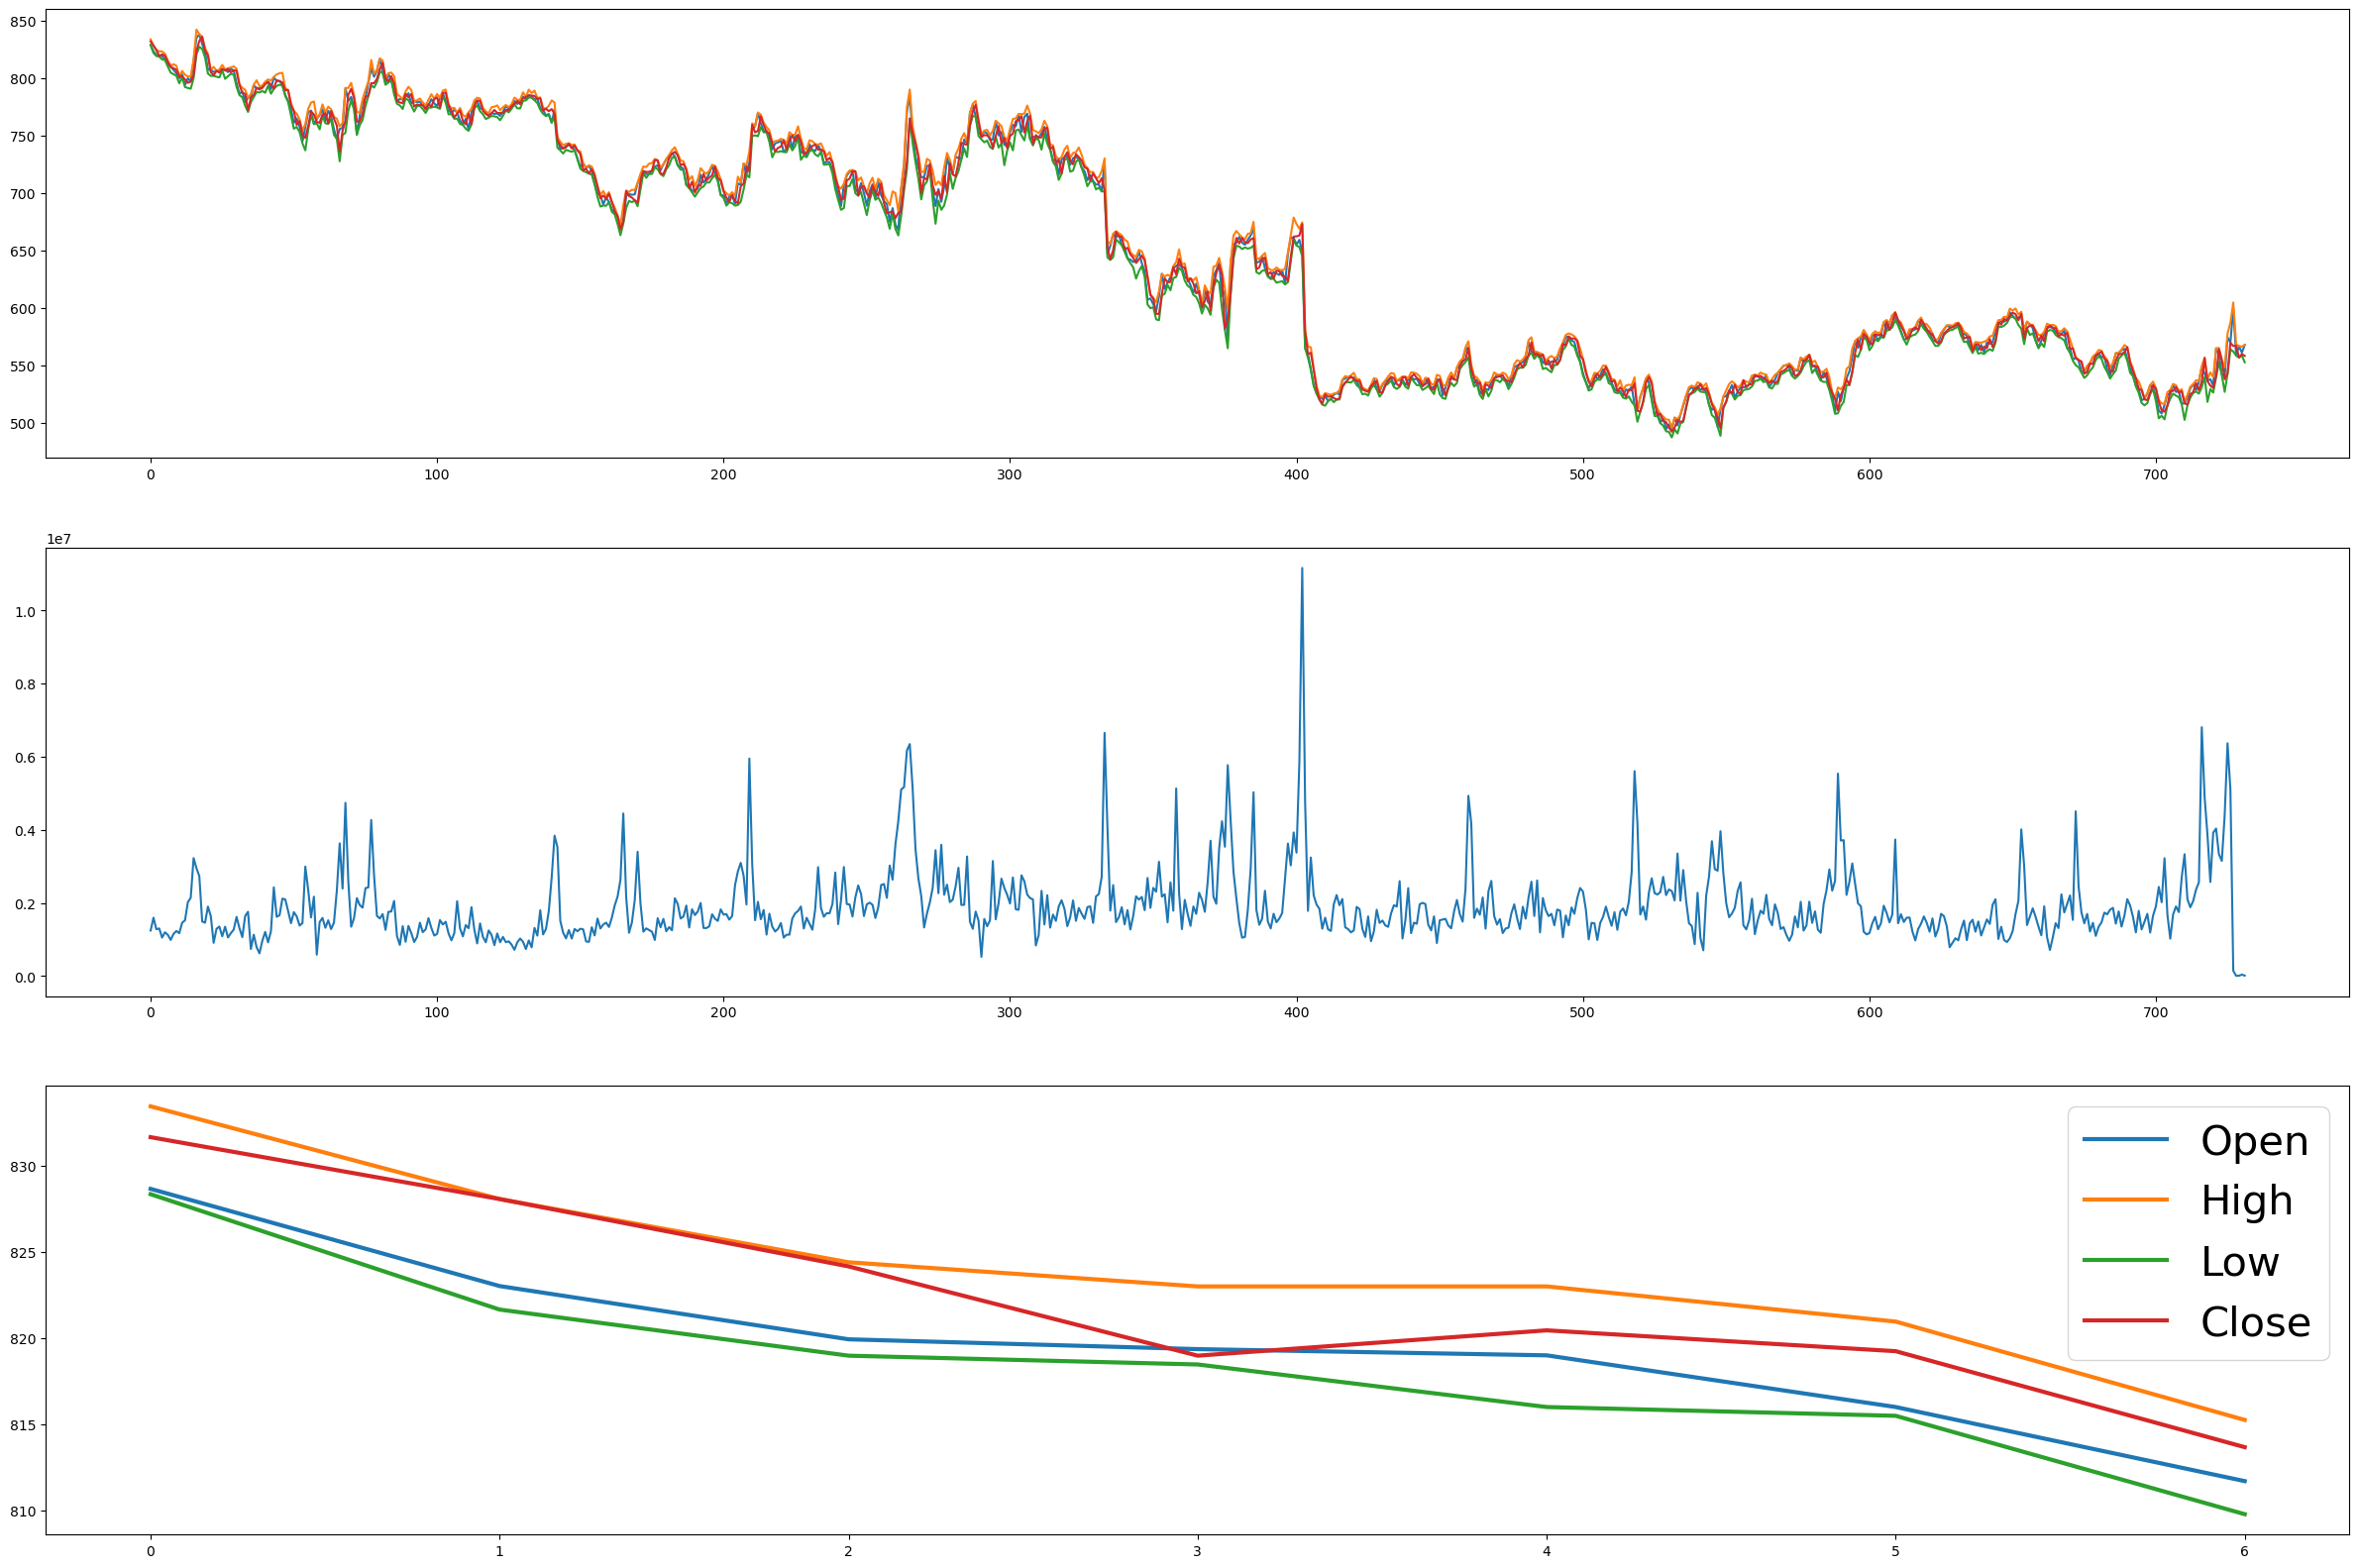

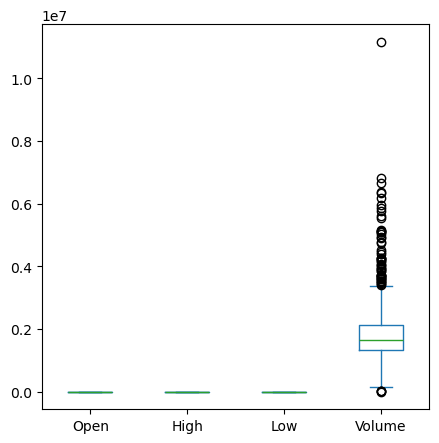

(732, 4) (732, 1)


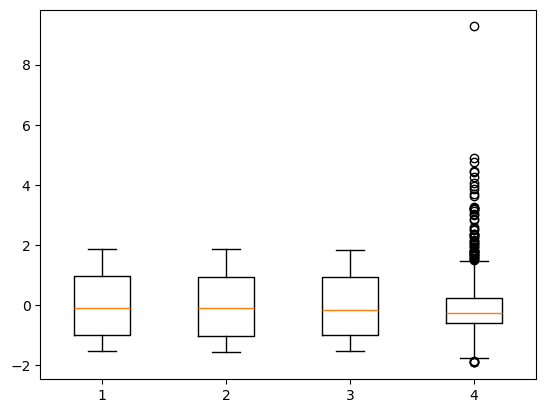

(512, 4) (220, 4) (512, 1) (220, 1)
Epoch 1/100
25/26 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.2917 - mae: 0.4299
Epoch 1: val_loss improved from inf to 0.00371, saving model to ./model/stock/01-0.0037.keras
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.2805 - mae: 0.4183 - val_loss: 0.0037 - val_mae: 0.0466
Epoch 2/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0168 - mae: 0.0842
Epoch 2: val_loss did not improve from 0.00371
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0167 - mae: 0.0841 - val_loss: 0.0064 - val_mae: 0.0636
Epoch 3/100
23/26 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0056 - mae: 0.0568
Epoch 3: val_loss improved from 0.00371 to 0.00274, saving model to ./model/stock/03-0.0027.keras
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0055 - mae: 0.0564 - val_loss: 0.0027 - val_mae: 0.0393
Epoch 4/100
19/26 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0045 - mae: 0.0486 
Epoch 4: val_loss did not improve from 0.00274
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/ste

In [24]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Input
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("data-02-stock_daily.csv", header=1)


import matplotlib.pyplot as plt

fig = plt.figure(figsize=(30, 20))
ax1 = fig.add_subplot(3, 1, 1)
ax2 = fig.add_subplot(3, 1, 2)
ax3 = fig.add_subplot(3, 1, 3)

ax1.plot(df['Open'])
ax1.plot(df['High'])
ax1.plot(df['Low'])
ax1.plot(df['Close'])
ax2.plot(df['Volume'])
ax3.plot(df['Open'][0:7], linewidth=3.0, label="Open")
ax3.plot(df['High'][0:7], linewidth=3.0, label="High")
ax3.plot(df['Low'][0:7], linewidth=3.0, label="Low")
ax3.plot(df['Close'][0:7], linewidth=3.0, label="Close")

ax3.legend(prop={'size':30})

x = df[["Open", "High", "Low", "Volume"]]
y = pd.DataFrame(df["Close"])

x.plot.box(figsize=(5, 5))
plt.show()


#데이터 정규화
x = StandardScaler().fit_transform(x)
y = StandardScaler().fit_transform(y)
print(x.shape, y.shape)
plt.boxplot(x)
plt.show()

x_train = x[220:, :]
x_test = x[:220, :]
y_train = y[220:, :]
y_test = y[:220, :]
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

model = Sequential()
model.add(Input(shape=(4, )))
model.add(Dense(1024, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

model.compile(loss='mse', optimizer='adam', metrics=['mae'])

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
es = EarlyStopping(monitor='val_loss', patience=10)

import os
MODEL_DIR = './model/stock/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

modelpath = "./model/stock/{epoch:02d}-{val_loss:.4f}.keras"
cp = ModelCheckpoint(filepath = modelpath, monitor='val_loss', verbose=1, save_best_only=True)

seed = 123
np.random.seed(seed)
tf.random.set_seed(seed)
history = model.fit(x_train, y_train, validation_split=0.2, epochs=100, batch_size = 16, callbacks=[es, cp])

loss:[0.1398986428976059, 0.015726037323474884, 0.00525099178776145, 0.00436369376257062, 0.005051311105489731, 0.004720212426036596, 0.0036937561817467213, 0.003192485310137272, 0.003218346508219838, 0.003219211008399725, 0.002979637123644352, 0.0029075315687805414, 0.0030350475572049618, 0.00307653215713799, 0.0031795238610357046, 0.003165242960676551]
MAE:[0.2738882303237915, 0.08189373463392258, 0.05413418263196945, 0.0486002117395401, 0.04931037500500679, 0.04924826696515083, 0.04427272453904152, 0.04259240999817848, 0.04255179688334465, 0.04279665648937225, 0.042024508118629456, 0.041706960648298264, 0.04353783652186394, 0.044272761791944504, 0.04555648937821388, 0.0458218976855278]
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0049 - mae: 0.0621 
loss 0.0037481877952814102 mase 0.052604932337999344
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


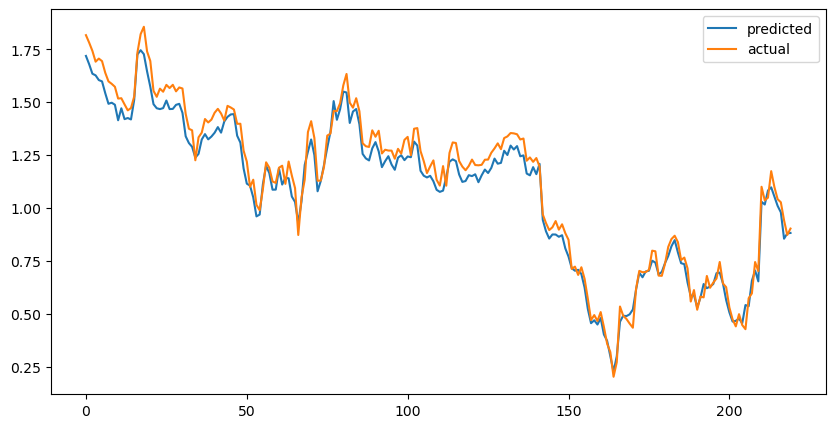

Evaluate : 0.003748187549663132


In [36]:
print("loss:"+str(history.history['loss']))
print("MAE:"+str(history.history['mae']))

res=model.evaluate(x_test, y_test, batch_size=32)
print("loss", res[0], "mase", res[1])

xhat = x_test
yhat = model.predict(xhat)
plt.figure(figsize=(10, 5))
plt.plot(yhat, label = "predicted")
plt.plot(y_test, label = "actual")
plt.legend()
plt.show()
print("Evaluate : {}".format(np.average((yhat-y_test)**2)))


In [82]:
from tensorflow.keras.models import load_model
full_data = [
    [819, 823, 816, 1053600, 820.450012],
    [816, 820.958984, 815.48999, 1198100, 819.23999],
    [811.700012, 815.25, 809.780029, 1129100, 813.669983],
    [809.51001, 810.659973, 804.539978, 989700, 809.559998],
    [807, 811.840027, 803.190002, 1155300, 808.380005],
    [803.98999, 810.5, 801.780029, 1235200, 806.969971],
    [799.700012, 801.669983, 795.25, 1174200, 801.340027],
    [802.98999, 806, 800.369995, 1460400, 801.48999],
    [793.799988, 802.700012, 792, 1525800, 798.530029],
    [799.679993, 801.190002, 791.190002, 2023300, 795.695007]
]
df2 = pd.DataFrame(full_data, columns=['Open', 'High', 'Low', 'Volume', 'Close'])


x_samples = df[['Open', 'High', 'Low', 'Volume'] ]
y_samples = df['Close']

x_scaler = StandardScaler()
x_scaled = x_scaler.fit_transform(x_samples)
y_scaler = StandardScaler()
y_scaled = y_scaler.fit_transform(y_samples.values.reshape(-1, 1))

model = load_model('./model/stock/06-0.0024.keras')

predict_scaled = model.predict(x_scaled)

predictions = y_scaler.inverse_transform(predict_scaled)

print("예측값:")
print(predictions.flatten())
print("실제값:")
print(y_samples.values)

mae = mean_absolute_error(y_samples, predictions)
print(f"오차평균 : {mae}")

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
예측값:
[808.07697 804.299   800.20135 799.53436 797.4797  796.67285 791.60034
 787.19305 787.3663  786.1924  779.8131  784.981   779.4601  781.27826
 780.5153  792.16797 811.9878  813.60126 808.98047 801.55414 793.5588
 787.2502  784.7003  785.07135 785.6998  788.167   785.35956 784.65753
 786.7985  787.0117  781.9669  771.81024 769.47626 766.9665  763.9442
 764.0574  771.7768  772.7083  770.2662  772.41034 774.69666 776.52106
 773.7419  780.98883 780.959   781.8473  781.8966  772.6262  768.72906
 758.0411  750.76434 750.7208  745.07086 736.05133 740.5952  753.3291
 758.99384 755.06244 746.7702  749.71924 758.1993  750.39966 754.5744
 753.35406 744.95734 742.8407  736.6144  744.8727  763.2276  767.07526
 770.1753  763.2647  746.9116  753.14    760.626   768.50415 776.4881
 789.55634 782.32587 785.32336 793.4063  790.9631  778.1349  783.9979
 783.95886 777.06537 764.1215  762.458   762.3996  766.6575  769.88654
 764.6995  759.1052  761.3703  763.6666

NameError: name 'mean_absolute_error' is not defined